In [1]:
#Let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Now let's load the dataset
df_capacidad = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Capacidad.csv', sep=';')
df_demanda = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Demanda(bc).csv', sep=';')
df_generacion = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Generacion.csv', sep=';')
df_perdidas = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Perdidas.csv', sep=';')
df_precios = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Precios.csv', sep=';', encoding="latin1")
df_clima1 = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Clima.csv', sep=';', encoding="latin1")
df_clima2 = pd.read_csv('c:/Users/ignac/Desktop/202502PT/Proyecto final/CSV/Clima2.csv', sep=';', encoding="latin1")

In [3]:
df_clima = pd.concat([df_clima1, df_clima2], ignore_index=True)

Now we have the datasets loaded, so let's start with some basic analysis:
- Duplicate rows
- Nulls
- Data types

In [4]:
#Let's see those rows that are duplicated
clima_duplicados = df_clima.duplicated().sum()
print(f"Número de filas duplicadas en df_clima: {clima_duplicados}")

#Let's see if we have null values in the dataset and the percentage they represent
null_values_clima = df_clima.isnull().sum()
null_percentage_clima = (null_values_clima / len(df_clima)) * 100
print("Valores nulos en df_clima:")
print(null_values_clima[null_values_clima > 0])
print("Porcentaje de valores nulos en df_clima:")
print(null_percentage_clima[null_percentage_clima > 0])

#Let's now check the data types of the columns
data_types_clima = df_clima.dtypes
print("Tipos de datos en df_clima:")
print(data_types_clima)

Número de filas duplicadas en df_clima: 26620
Valores nulos en df_clima:
Temp Media (ºC)        1999
Humedad Media (%)      5972
Precipitacion (mm)    10339
dtype: int64
Porcentaje de valores nulos en df_clima:
Temp Media (ºC)       0.108596
Humedad Media (%)     0.324430
Precipitacion (mm)    0.561668
dtype: float64
Tipos de datos en df_clima:
Source.Name           object
IdProvincia            int64
IdEstacion             int64
Fecha                 object
Año                    int64
Dia                    int64
Temp Media (ºC)       object
Humedad Media (%)     object
Precipitacion (mm)    object
dtype: object


Now we know:
- We have a lot of duplicate rows we must remove.
- We don't have any relevant nulls.
- We have some columns that are not in the correct data type and we will need to convert them (Fecha to datetime, for example).

In [5]:
#Let's remove the duplicated rows
df_clima = df_clima.drop_duplicates()
#Now leet's fix the data types of the columns:
#First the column 'Fecha' should be in datetime format
df_clima['Fecha'] = pd.to_datetime(df_clima['Fecha'], format='%d/%m/%Y')
#Now columns 'Temp Media (ºC)', 'Humedad Media (%)' and 'Precipitacion (mm)' should be in float format
df_clima['Temp Media (ºC)'] = df_clima['Temp Media (ºC)'].astype(str).str.replace(',', '.').astype(float)
df_clima['Humedad Media (%)'] = df_clima['Humedad Media (%)'].astype(str).str.replace(',', '.').astype(float)
df_clima['Precipitacion (mm)'] = df_clima['Precipitacion (mm)'].astype(str).str.replace(',', '.').astype(float)

#Let's do the same analysis for the `df_precios` dataset.

In [6]:
#Let's see those rows that are duplicated
precios_duplicados = df_precios.duplicated().sum()
print(f"Número de filas duplicadas en df_precios: {precios_duplicados}")

#Let's see if we have null values in the dataset and the percentage they represent
null_values_precios = df_precios.isnull().sum()
null_percentage_precios = (null_values_precios / len(df_precios)) * 100
print("Valores nulos en df_precios:")
print(null_values_precios[null_values_precios > 0])
print("Porcentaje de valores nulos en df_precios:")
print(null_percentage_precios[null_percentage_precios > 0])

#Let's now check the data types of the columns
data_types_precios = df_precios.dtypes
print("Tipos de datos en df_precios:")
print(data_types_precios)

Número de filas duplicadas en df_precios: 0
Valores nulos en df_precios:
Reserva de potencia adicional a subir    41
Fallo nominacion UPG                     41
Servicio de interrumpibilidad            41
Mecanismo ajuste RD-L 10/2022            96
dtype: int64
Porcentaje de valores nulos en df_precios:
Reserva de potencia adicional a subir    29.927007
Fallo nominacion UPG                     29.927007
Servicio de interrumpibilidad            29.927007
Mecanismo ajuste RD-L 10/2022            70.072993
dtype: float64
Tipos de datos en df_precios:
Año                                                  int64
Mes                                                  int64
Mercado diario                                      object
Mercado intradiario (subastas MIBEL y continuo)     object
Restricciones tecnicas PDBF                         object
Banda de regulacion secundaria                      object
Reserva de potencia adicional a subir               object
Restricciones tecnicas en tiempo 

The only thing we need to fix in this dataset is to replace the commas with dots so we can converts values to float.

In [7]:
#Let's replace the commas with dots in all columns and convert them to float
df_precios = df_precios.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
df_precios['Mercado diario'] = df_precios['Mercado diario'].astype(str).str.replace(',', '.').astype(float)
df_precios['Mercado intradiario (subastas MIBEL y continuo)'] = df_precios['Mercado intradiario (subastas MIBEL y continuo)'].astype(str).str.replace(',', '.').astype(float)
df_precios['Restricciones tecnicas PDBF'] = df_precios['Restricciones tecnicas PDBF'].astype(str).str.replace(',', '.').astype(float)
df_precios['Banda de regulacion secundaria'] = df_precios['Banda de regulacion secundaria'].astype(str).str.replace(',', '.').astype(float)
df_precios['Reserva de potencia adicional a subir'] = df_precios['Reserva de potencia adicional a subir'].astype(str).str.replace(',', '.').astype(float)
df_precios['Restricciones tecnicas en tiempo real'] = df_precios['Restricciones tecnicas en tiempo real'].astype(str).str.replace(',', '.').astype(float)
df_precios['Incumplimiento de energia de balance'] = df_precios['Incumplimiento de energia de balance'].astype(str).str.replace(',', '.').astype(float)
df_precios['Coste desvios'] = df_precios['Coste desvios'].astype(str).str.replace(',', '.').astype(float)
df_precios['Saldo desvios'] = df_precios['Saldo desvios'].astype(str).str.replace(',', '.').astype(float)
df_precios['Control del factor de potencia'] = df_precios['Control del factor de potencia'].astype(str).str.replace(',', '.').astype(float)
df_precios['Saldo PO 14.6'] = df_precios['Saldo PO 14.6'].astype(str).str.replace(',', '.').astype(float)
df_precios['Pagos por capacidad'] = df_precios['Pagos por capacidad'].astype(str).str.replace(',', '.').astype(float)
df_precios['Servicio de interrumpibilidad'] = df_precios['Servicio de interrumpibilidad'].astype(str).str.replace(',', '.').astype(float)
df_precios['Precio total (/MWh)'] = df_precios['Precio total (/MWh)'].astype(str).str.replace(',', '.').astype(float)
df_precios['Energia de cierre (MWh)'] = df_precios['Energia de cierre (MWh)'].astype(str).str.replace(',', '.').astype(float)
df_precios['Mecanismo ajuste RD-L 10/2022'] = df_precios['Mecanismo ajuste RD-L 10/2022'].astype(str).str.replace(',', '.').astype(float)


#Let's analyze the next dataset

In [8]:
#Let's see those rows that are duplicated
perdidas_duplicados = df_perdidas.duplicated().sum()
print(f"Número de filas duplicadas en df_perdidas: {perdidas_duplicados}")

#Let's see if we have null values in the dataset and the percentage they represent
null_values_perdidas = df_perdidas.isnull().sum()
null_percentage_perdidas = (null_values_perdidas / len(df_perdidas)) * 100
print("Valores nulos en df_perdidas:")
print(null_values_perdidas[null_values_perdidas > 0])
print("Porcentaje de valores nulos en df_perdidas:")
print(null_percentage_perdidas[null_percentage_perdidas > 0])

#Let's now check the data types of the columns
data_types_perdidas = df_perdidas.dtypes
print("Tipos de datos en df_perdidas:")
print(data_types_perdidas)

Número de filas duplicadas en df_perdidas: 0
Valores nulos en df_perdidas:
Series([], dtype: int64)
Porcentaje de valores nulos en df_perdidas:
Series([], dtype: float64)
Tipos de datos en df_perdidas:
Fecha                     object
Perdidas de transporte    object
Demanda                   object
Region                    object
dtype: object


We have to change the format of the three first columns

In [9]:
#Let's change column 'Fecha' as it should be in datetime format
df_perdidas['Fecha'] = pd.to_datetime(df_perdidas['Fecha'], format='%d/%m/%Y')
#Now columns 'Perdidas de transporte' and 'Demanda' should be in float format
df_perdidas['Perdidas de transporte'] = df_perdidas['Perdidas de transporte'].astype(str).str.replace(',', '.').astype(float)
df_perdidas['Demanda'] = df_perdidas['Demanda'].astype(str).str.replace(',', '.').astype(float)

Time to check the next dataset.

In [10]:
#Let's see those rows that are duplicated
generacion_duplicados = df_generacion.duplicated().sum()
print(f"Número de filas duplicadas en df_generacion: {generacion_duplicados}")

#Let's see if we have null values in the dataset and the percentage they represent
null_values_generacion = df_generacion.isnull().sum()
null_percentage_generacion = (null_values_generacion / len(df_generacion)) * 100
print("Valores nulos en df_generacion:")
print(null_values_generacion[null_values_generacion > 0])
print("Porcentaje de valores nulos en df_generacion:")
print(null_percentage_generacion[null_percentage_generacion > 0])

#Let's now check the data types of the columns
data_types_generacion = df_generacion.dtypes
print("Tipos de datos en df_generacion:")
print(data_types_generacion)

Número de filas duplicadas en df_generacion: 0
Valores nulos en df_generacion:
Hidroeolica    911
dtype: int64
Porcentaje de valores nulos en df_generacion:
Hidroeolica    18.591837
dtype: float64
Tipos de datos en df_generacion:
Fecha                     object
Hidraulica                object
Nuclear                   object
Carbon                    object
Motores diesel            object
Turbina de gas            object
Turbina de vapor          object
Ciclo combinado           object
Eolica                    object
Solar fotovoltaica        object
Solar termica             object
Otras renovables          object
Cogeneracion              object
Residuos no renovables    object
Residuos renovables       object
Fuel + Gas                object
Hidroeolica               object
Generacion total          object
dtype: object


All columns have the wrong format

In [11]:
#All columns except "Fecha", which should be datetime, should be as float
df_generacion['Fecha'] = pd.to_datetime(df_generacion['Fecha'], format='%d/%m/%Y')
df_generacion = df_generacion.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
df_generacion['Hidraulica'] = df_generacion['Hidraulica'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Nuclear'] = df_generacion['Nuclear'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Carbon'] = df_generacion['Carbon'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Motores diesel'] = df_generacion['Motores diesel'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Turbina de gas'] = df_generacion['Turbina de gas'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Turbina de vapor'] = df_generacion['Turbina de vapor'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Ciclo combinado'] = df_generacion['Ciclo combinado'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Eolica'] = df_generacion['Eolica'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Solar fotovoltaica'] = df_generacion['Solar fotovoltaica'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Solar termica'] = df_generacion['Solar termica'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Otras renovables'] = df_generacion['Otras renovables'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Cogeneracion'] = df_generacion['Cogeneracion'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Residuos no renovables'] = df_generacion['Residuos no renovables'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Residuos renovables'] = df_generacion['Residuos renovables'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Fuel + Gas'] = df_generacion['Fuel + Gas'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Hidroeolica'] = df_generacion['Hidroeolica'].astype(str).str.replace(',', '.').astype(float)
df_generacion['Generacion total'] = df_generacion['Generacion total'].astype(str).str.replace(',', '.').astype(float)


Now let's check the next dataset.

In [12]:
#Let's see those rows that are duplicated
demanda_duplicados = df_demanda.duplicated().sum()
print(f"Número de filas duplicadas en df_demanda: {demanda_duplicados}")

#Let's see if we have null values in the dataset and the percentage they represent
null_values_demanda = df_demanda.isnull().sum()
null_percentage_demanda = (null_values_demanda / len(df_demanda)) * 100
print("Valores nulos en df_demanda:")
print(null_values_demanda[null_values_demanda > 0])
print("Porcentaje de valores nulos en df_demanda:")
print(null_percentage_demanda[null_percentage_demanda > 0])

#Let's now check the data types of the columns
data_types_demanda = df_demanda.dtypes
print("Tipos de datos en df_demanda:")
print(data_types_demanda)

Número de filas duplicadas en df_demanda: 0
Valores nulos en df_demanda:
Series([], dtype: int64)
Porcentaje de valores nulos en df_demanda:
Series([], dtype: float64)
Tipos de datos en df_demanda:
Fecha      object
Demanda    object
Tipo       object
dtype: object


Columns 'Fecha' and 'Demanda' have the wrong format

In [13]:
#First the column 'Fecha' should be in datetime format
df_demanda['Fecha'] = pd.to_datetime(df_demanda['Fecha'], format='%d/%m/%Y')
#Now columns 'Demanda' should be in float format
df_demanda['Demanda'] = df_demanda['Demanda'].astype(str).str.replace(',', '.').astype(float)

Let's analyze the last dataset

In [14]:
#Let's see those rows that are duplicated
capacidad_duplicados = df_capacidad.duplicated().sum()
print(f"Número de filas duplicadas en df_capacidad: {capacidad_duplicados}")

#Let's see if we have null values in the dataset and the percentage they represent
null_values_capacidad = df_capacidad.isnull().sum()
null_percentage_capacidad = (null_values_capacidad / len(df_capacidad)) * 100
print("Valores nulos en df_capacidad:")
print(null_values_capacidad[null_values_capacidad > 0])
print("Porcentaje de valores nulos en df_capacidad:")
print(null_percentage_capacidad[null_percentage_capacidad > 0])

#Let's now check the data types of the columns
data_types_capacidad = df_capacidad.dtypes
print("Tipos de datos en df_capacidad:")
print(data_types_capacidad)

Número de filas duplicadas en df_capacidad: 0
Valores nulos en df_capacidad:
Series([], dtype: int64)
Porcentaje de valores nulos en df_capacidad:
Series([], dtype: float64)
Tipos de datos en df_capacidad:
Type of Energy         object
Capacity/Generation    object
On/Off grid            object
Year                    int64
MW                     object
dtype: object


The only change we must do is to correct the format on column 'MW'

In [15]:
df_capacidad['MW'] = df_capacidad['MW'].astype(str).str.replace(',', '.').astype(float)

In order to be able to analyze and compare the datasets, we need to ensure they all have the columns "Fecha" in the same format.
Right now we have:
- df_clima, df_perdidas, df_generacion, df_demanda with column 'Fecha' as datetime with daily data.
- df_precios with columns 'Año' and 'Mes' as integers with monthly data.
- df_capacidad with column 'Year' as integer with yearly data.

We will convert the daily data into monthly using the mean and we will create a column in df_precios which will allow us to merge the datasets.

In [16]:
for df in [df_clima, df_perdidas, df_generacion, df_demanda]:
    df['año_mes'] = df['Fecha'].dt.to_period('M')

df_clima_mean = df_clima.groupby('año_mes')[
    ['Temp Media (ºC)', 'Humedad Media (%)', 'Precipitacion (mm)']
].mean().reset_index()

df_perdidas_mean = df_perdidas.groupby('año_mes')[
    ['Perdidas de transporte', 'Demanda']
].mean().reset_index()

cols_generacion = [
    'Hidraulica', 'Nuclear', 'Carbon', 'Motores diesel', 'Turbina de gas',
    'Turbina de vapor', 'Ciclo combinado', 'Eolica', 'Solar fotovoltaica',
    'Solar termica', 'Otras renovables', 'Cogeneracion', 'Residuos no renovables',
    'Residuos renovables', 'Fuel + Gas', 'Hidroeolica', 'Generacion total'
]
df_generacion_mean = df_generacion.groupby('año_mes')[cols_generacion].mean().reset_index()

df_demanda_mean = df_demanda.groupby('año_mes')[['Demanda']].mean().reset_index()

In [17]:
df_precios['año_mes'] = pd.to_datetime(
    df_precios['Año'].astype(str) + '-' + df_precios['Mes'].astype(str).str.zfill(2)
).dt.to_period('M') 

Now we have the datasets with the same format for the 'Fecha' column, we can proceed to merge them for analysis.

In [18]:
df_total = df_clima_mean \
    .merge(df_perdidas_mean, on='año_mes', how='outer') \
    .merge(df_generacion_mean, on='año_mes', how='outer') \
    .merge(df_demanda_mean, on='año_mes', how='outer') \
    .merge(df_precios, on='año_mes', how='outer')


In [19]:
df_total.drop(columns=['Demanda_x'], inplace=True)

df_total.rename(columns={'Demanda_y': 'Demanda'}, inplace=True)
df_total.rename(columns={'Precio total (/MWh)': 'Precio'}, inplace=True)


Now we can start with the analysis.

# Is there higher electricity demand on cooler days?

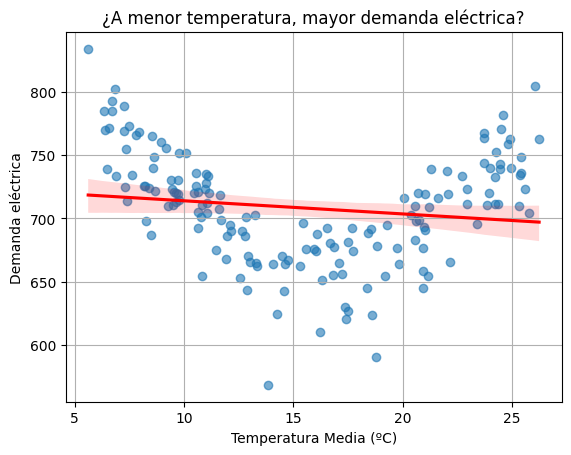

In [20]:
sns.regplot(
    data=df_total,
    x='Temp Media (ºC)',
    y='Demanda',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('¿A menor temperatura, mayor demanda eléctrica?')
plt.xlabel('Temperatura Media (ºC)')
plt.ylabel('Demanda eléctrica')
plt.grid(True)
plt.show()

In [21]:
corr_temp_demanda = df_total[['Temp Media (ºC)', 'Demanda']].corr().iloc[0, 1]
print(f"Correlación Temp Media vs Demanda: {corr_temp_demanda:.2f}")

Correlación Temp Media vs Demanda: -0.14


Apparently there is a small negative correlation between temperature and electricity demand, which means that on cooler days, the electricity demand is slightly higher.
This could be due to the fact that people use more electricity for heating during cooler days.
But, let's continue checking this hypothesis 

Let's analyze the correlation splitting the months between summer and winter.

Correlación Temp vs Demanda en Invierno: -0.70
Correlación Temp vs Demanda en Verano: 0.66
Correlación Temp vs Demanda en Intermedio: -0.27


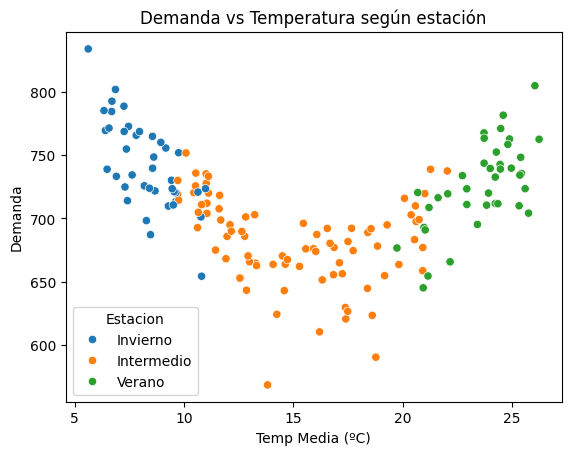

In [22]:
df_total['Mes'] = df_total['año_mes'].dt.month

def estacion(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Intermedio'

df_total['Estacion'] = df_total['Mes'].apply(estacion)

for est in ['Invierno', 'Verano', 'Intermedio']:
    sub = df_total[df_total['Estacion'] == est]
    corr = sub[['Temp Media (ºC)', 'Demanda']].corr().iloc[0,1]
    print(f"Correlación Temp vs Demanda en {est}: {corr:.2f}")

    import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_total, x='Temp Media (ºC)', y='Demanda', hue='Estacion')
plt.title('Demanda vs Temperatura según estación')
plt.show()



We cannot confirm there are more demand on cooler days but we see that there is a correlation between the temperature and the electricity demand:
- In winter the correlation is -0.7 which means that on cooler days, the electricity demand is higher (probably due to heating).
- In summer the correlation is 0.66 which means that on warmer days, the electricity demand is higher (probably due to air conditioning).
- But in the intermediate months (spring and autumn) the correlation is low (-0.27), which means that the temperature does not have a significant impact on the electricity demand.

# Conventional generation decreases in proportion to demand when solar generation increases

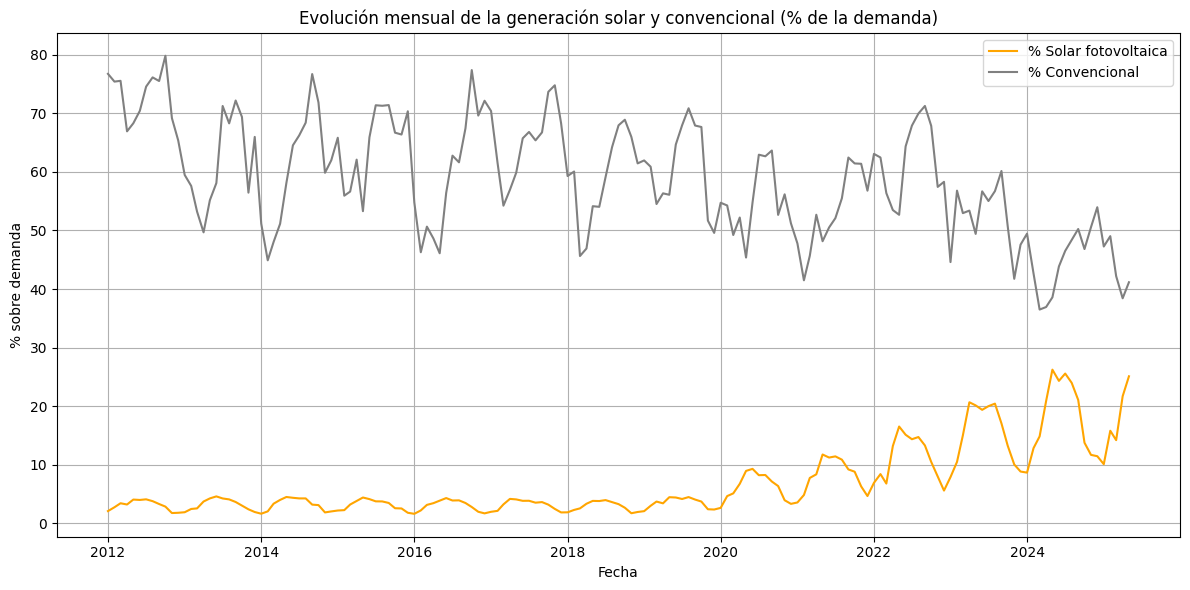

Correlación entre % Solar y % Convencional: -0.49


In [27]:
df_total['% Solar'] = df_total['Solar fotovoltaica'] / df_total['Demanda'] * 100

df_total['% Convencional'] = (
    df_total[['Nuclear', 'Carbon', 'Motores diesel', 'Turbina de gas',
              'Turbina de vapor', 'Ciclo combinado', 'Cogeneracion',
              'Residuos no renovables', 'Fuel + Gas']].sum(axis=1)
    / df_total['Demanda'] * 100
)

df_total['año_mes_dt'] = df_total['año_mes'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(df_total['año_mes_dt'], df_total['% Solar'], label='% Solar fotovoltaica', color='orange')
plt.plot(df_total['año_mes_dt'], df_total['% Convencional'], label='% Convencional', color='gray')
plt.title('Evolución mensual de la generación solar y convencional (% de la demanda)')
plt.xlabel('Fecha')
plt.ylabel('% sobre demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlacion = df_total[['% Solar', '% Convencional']].corr().iloc[0, 1]
print(f"Correlación entre % Solar y % Convencional: {correlacion:.2f}")

We can see in the graph that when solar generation increases, conventional generation decreases in proportion to demand. This correlation is almost null until 2020 where it starts to be more evident. This is probably due to the fact that solar generation has been increasing in recent years, which has led to a decrease in conventional generation. Let's investigate a bit more this correlation dividing the data into two periods: before and after 2020, and also taking into consideration the seasons.

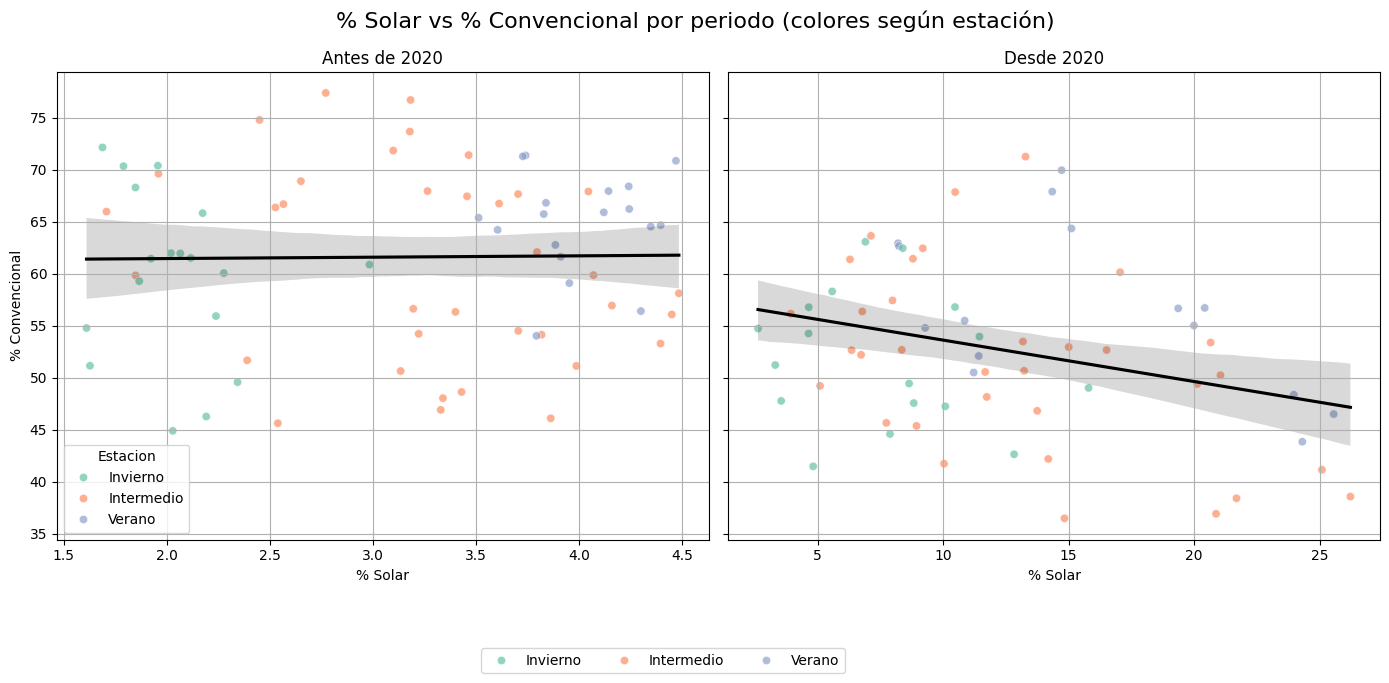


Correlaciones % Solar vs % Convencional (Antes de 2020):
 - Invierno: -0.17
 - Intermedio: -0.29
 - Verano: 0.04

Correlaciones % Solar vs % Convencional (Desde 2020):
 - Invierno: -0.19
 - Intermedio: -0.47
 - Verano: -0.53


In [34]:
df_pre2020 = df_total[df_total['Año'] < 2020]
df_post2020 = df_total[df_total['Año'] >= 2020]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Pre 2020
sns.scatterplot(
    data=df_pre2020, x='% Solar', y='% Convencional',
    hue='Estacion', palette='Set2', ax=axes[0], alpha=0.7
)
sns.regplot(
    data=df_pre2020, x='% Solar', y='% Convencional',
    scatter=False, ax=axes[0], color='black'
)
axes[0].set_title('Antes de 2020')
axes[0].grid(True)

# Post 2020
sns.scatterplot(
    data=df_post2020, x='% Solar', y='% Convencional',
    hue='Estacion', palette='Set2', ax=axes[1], alpha=0.7
)
sns.regplot(
    data=df_post2020, x='% Solar', y='% Convencional',
    scatter=False, ax=axes[1], color='black'
)
axes[1].set_title('Desde 2020')
axes[1].grid(True)

fig.suptitle('% Solar vs % Convencional por periodo (colores según estación)', fontsize=16)
plt.tight_layout()
plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.3), ncol=4)
plt.show()


def print_correlations(df, periodo_name):
    print(f"\nCorrelaciones % Solar vs % Convencional ({periodo_name}):")
    for est in df['Estacion'].unique():
        df_est = df[df['Estacion'] == est]
        corr = df_est[['% Solar', '% Convencional']].corr().iloc[0,1]
        print(f" - {est}: {corr:.2f}")

print_correlations(df_pre2020, "Antes de 2020")
print_correlations(df_post2020, "Desde 2020")

We can confirm that, in 2020, there is a change and the correlation between solar generation and conventional generation becomes more evident. Before 2020, the correlation is almost null, but after 2020, the correlation is getting stronger, especially in summer.

# Let's analyze now the same correlation but with hidroelectric generation

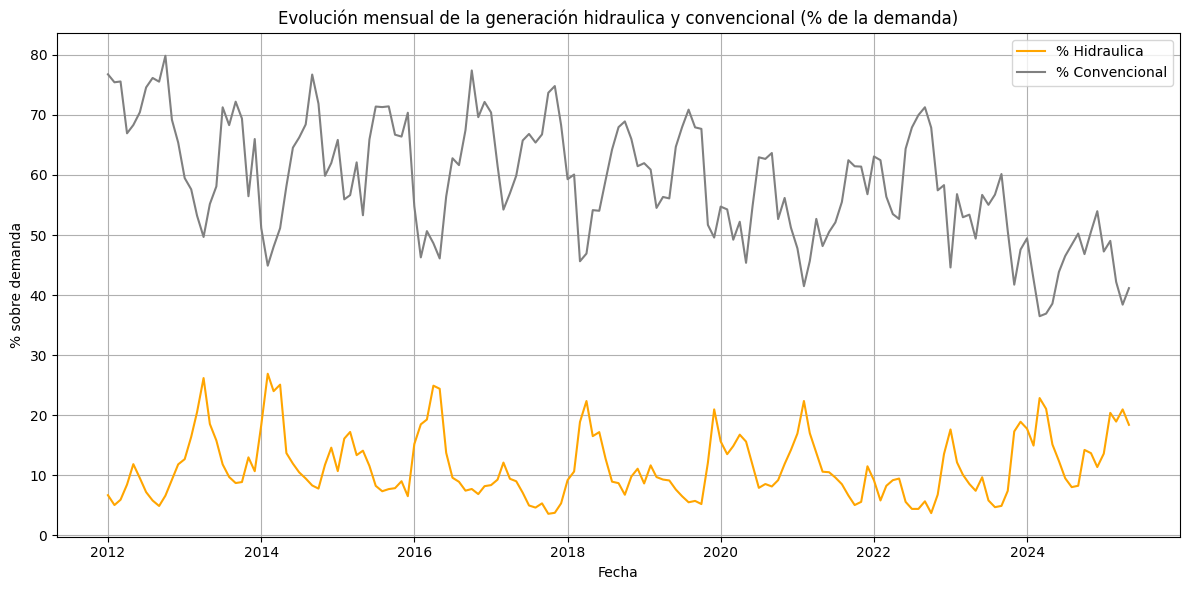

Correlación entre % Hidraulica y % Convencional: -0.72


In [35]:
df_total['% Hidraulica'] = df_total['Hidraulica'] / df_total['Demanda'] * 100

plt.figure(figsize=(12, 6))
plt.plot(df_total['año_mes_dt'], df_total['% Hidraulica'], label='% Hidraulica', color='orange')
plt.plot(df_total['año_mes_dt'], df_total['% Convencional'], label='% Convencional', color='gray')
plt.title('Evolución mensual de la generación hidraulica y convencional (% de la demanda)')
plt.xlabel('Fecha')
plt.ylabel('% sobre demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlacion = df_total[['% Hidraulica', '% Convencional']].corr().iloc[0, 1]
print(f"Correlación entre % Hidraulica y % Convencional: {correlacion:.2f}")

There is a high negative correlation between hydroelectric generation and conventional generation, which means that when hydroelectric generation increases, conventional generation decreases. This is expected since hydroelectric generation is a renewable source of energy that can replace conventional generation. Let's investigate a bit further taking into consideration the seasons.

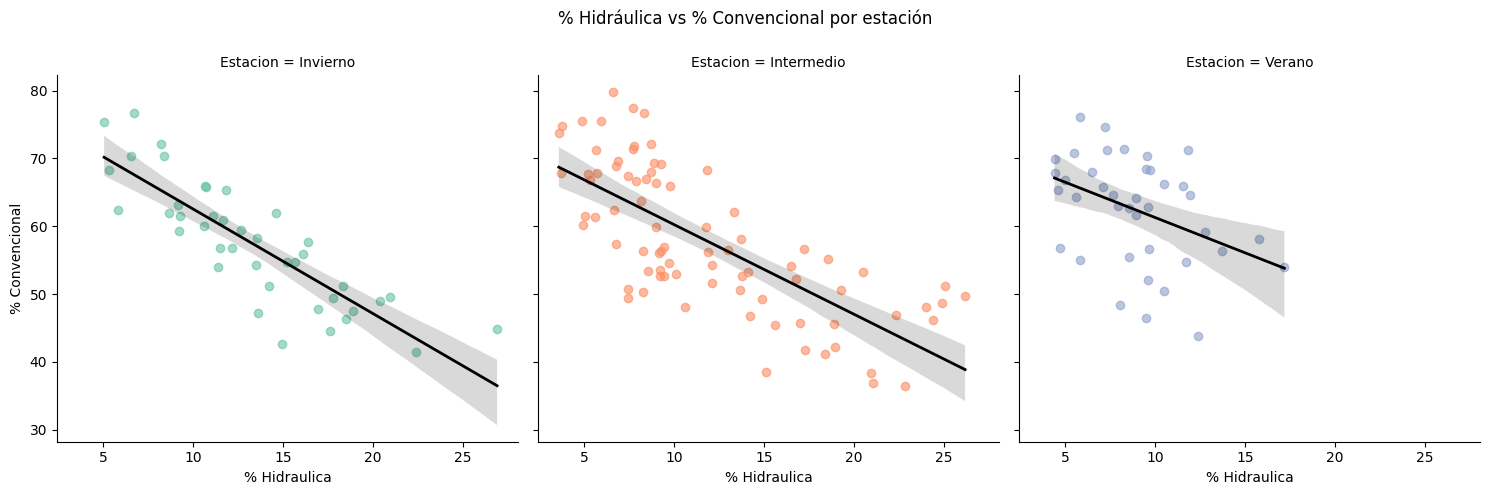

Correlaciones % Hidráulica vs % Convencional por estación:
 - Invierno: -0.85
 - Intermedio: -0.73
 - Verano: -0.40


In [37]:
# Crear figura con 3 subplots (uno por estación)
g = sns.lmplot(
    data=df_total,
    x='% Hidraulica', y='% Convencional',
    hue='Estacion', col='Estacion',
    palette='Set2',
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2, 'color': 'black'},
    height=5, aspect=1
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('% Hidráulica vs % Convencional por estación')
plt.show()

print("Correlaciones % Hidráulica vs % Convencional por estación:")
for est in df_total['Estacion'].unique():
    df_est = df_total[df_total['Estacion'] == est]
    corr = df_est[['% Hidraulica', '% Convencional']].corr().iloc[0, 1]
    print(f" - {est}: {corr:.2f}")

The correlation in winter is quite high which is normal since it is the season with more rainfall and therefore more hydroelectric generation. In spring and autumn the correlation is still high but not as much as in winter: this is also expected since these seasons have less rainfall than winter. In summer the correlation is lower, which is also expected since this season has less rainfall and therefore less hydroelectric generation. Nonetheless, the correlation is still negative, which means that when hydroelectric generation increases, conventional generation decreases.

# Is the price increasing/decreasing based on the season?

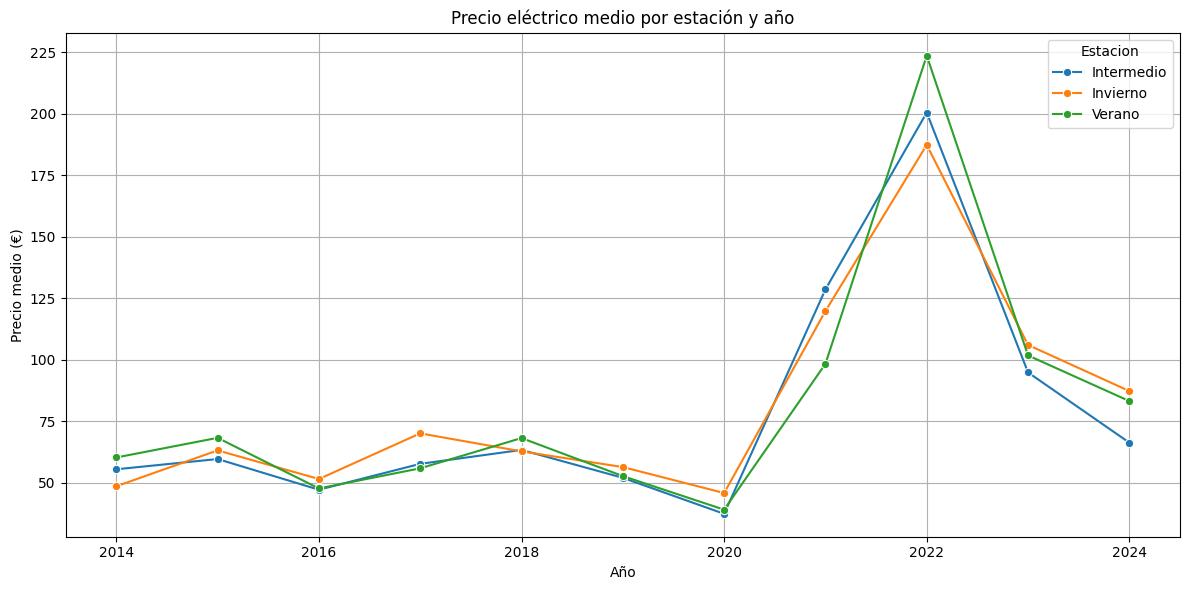

In [49]:
df_filtrado = df_total[df_total['año_mes_dt'] <= pd.to_datetime('2024-12-31')]

# Precio por año y estación
precios_por_estacion = df_filtrado.groupby(['Año', 'Estacion'])['Precio'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=precios_por_estacion, x='Año', y='Precio', hue='Estacion', marker='o')
plt.title('Precio eléctrico medio por estación y año')
plt.ylabel('Precio medio (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Is the price of electricity affected by the way it is generated?

There is no correlation between the price of electricity and the season. We can clearly see in the graph that the prices and stables no matter the season and some years the prices are higher in summer, others in winter, and others in spring or autumn. This is probably due to the fact that the price of electricity is influenced by many factors, such as the demand, the generation mix, the weather, etc.

Precio                      1.000000
% Ciclo combinado           0.599076
% Residuos renovables       0.380786
% Solar fotovoltaica        0.295885
% Eolica                    0.184911
% Fuel + Gas                0.149137
% Hidroeolica               0.129848
% Nuclear                   0.117952
% Turbina de gas           -0.023610
% Residuos no renovables   -0.114062
% Motores diesel           -0.235593
% Carbon                   -0.249140
% Cogeneracion             -0.346946
% Hidraulica               -0.381055
% Turbina de vapor         -0.431414
Name: Precio, dtype: float64


C:\Users\ignac\AppData\Local\Temp\ipykernel_11064\3019092615.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


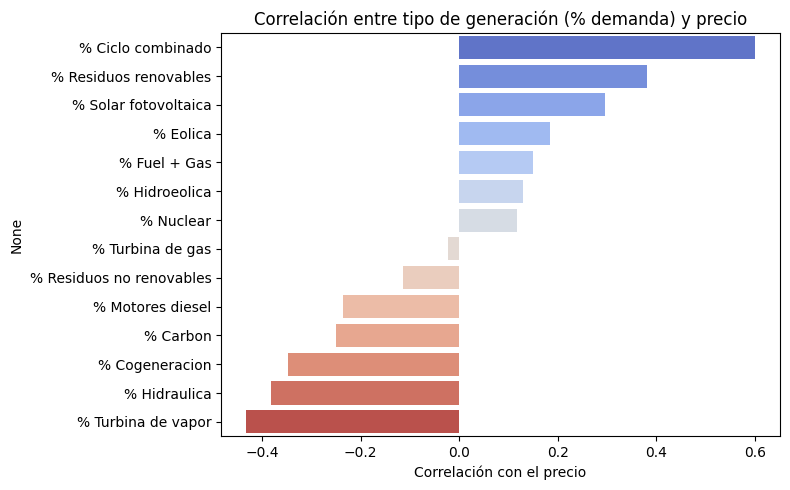

In [50]:
# Creamos columnas % por tipo de generación (puedes añadir más si lo deseas)
fuentes = ['Hidraulica', 'Nuclear', 'Carbon', 'Motores diesel', 'Turbina de gas', 'Turbina de vapor', 'Ciclo combinado', 'Solar fotovoltaica', 'Eolica', 'Cogeneracion', 'Residuos no renovables',
       'Residuos renovables', 'Fuel + Gas', 'Hidroeolica']
for fuente in fuentes:
    df_total[f'% {fuente}'] = df_total[fuente] / df_total['Demanda'] * 100

columnas_porcentaje = [f'% {f}' for f in fuentes]
columnas_porcentaje.append('Precio')

correlaciones = df_total[columnas_porcentaje].corr()['Precio'].sort_values(ascending=False)
print(correlaciones)

plt.figure(figsize=(8,5))
sns.barplot(
    x=correlaciones.drop('Precio').values,
    y=correlaciones.drop('Precio').index,
    palette='coolwarm'
)
plt.title('Correlación entre tipo de generación (% demanda) y precio')
plt.xlabel('Correlación con el precio')
plt.tight_layout()
plt.show()

We can see that 'Ciclo combinado' is the generation type which is increasing more the price which makes sense since it is the most expensive generation type.
It brings up that the 'Solar' generation type is the third generation type with more positive correlation with the price. This can be explained because in seasons where the solar generation is high, the demand is also high and therefore the price is also high. Let's check there is more solar generation in summer than in winter and that the price is correlated with the demand.

Generación solar media por estación (MW o la unidad que tengas):
Estacion
Intermedio    47.529398
Invierno      32.008192
Verano        61.342716
Name: Solar fotovoltaica, dtype: float64


C:\Users\ignac\AppData\Local\Temp\ipykernel_11064\219825486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=solar_por_estacion.index, y=solar_por_estacion.values, palette='summer')


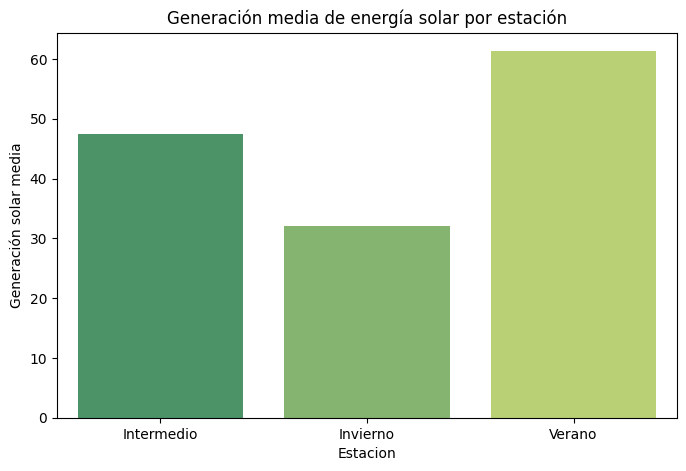

In [52]:
solar_por_estacion = df_total.groupby('Estacion')['Solar fotovoltaica'].mean()
print("Generación solar media por estación (MW o la unidad que tengas):")
print(solar_por_estacion)

plt.figure(figsize=(8,5))
sns.barplot(x=solar_por_estacion.index, y=solar_por_estacion.values, palette='summer')
plt.title('Generación media de energía solar por estación')
plt.ylabel('Generación solar media')
plt.show()

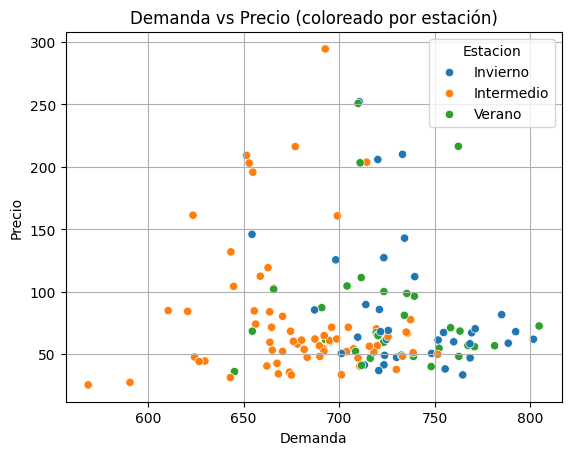

Correlación entre demanda y precio en Invierno: -0.34
Correlación entre demanda y precio en Intermedio: -0.09
Correlación entre demanda y precio en Verano: -0.04


In [55]:
sns.scatterplot(data=df_total, x='Demanda', y='Precio', hue='Estacion')
plt.title('Demanda vs Precio (coloreado por estación)')
plt.grid(True)
plt.show()

for est in df_total['Estacion'].unique():
    df_est = df_total[df_total['Estacion'] == est]
    corr = df_est[['Demanda', 'Precio']].corr().iloc[0, 1]
    print(f"Correlación entre demanda y precio en {est}: {corr:.2f}")

We can see it is true in summer there is more solar generation than in winter but in regards to the correlation between the price and the demand, we can see there is no correlation.

This leads us to think that the main factor that affects the price of electricity is how it is generated, and not the demand. This is because the price of electricity is determined by the cost of generation, which is influenced by the generation mix.